In [2]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

/project2/alvinjin_1630


In [3]:
import torch, jax
print("PyTorch sees:", torch.cuda.device_count(), "GPUs,", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")
print("JAX sees:", jax.devices())

PyTorch sees: 0 GPUs, none
JAX sees: [CpuDevice(id=0)]


In [4]:
trainer = Trainer(
    dataset='MNIST',
    hidden_dims=[256]*8,
    act_fn=jax.nn.relu,
    study_name='256x8_relu',
    num_epochs=50,
    batch_size=64
)

import dill
with open(f'{trainer.root}/data/label_0_1500.dill', 'rb') as f:
    dataset = dill.load(f)

trainer.run_ripser(dataset=dataset, dir_name='tests/ripser_k2/label_0', k=2, maxdim=1, thresh=15, num_models=10)

Model_ids: [5, 19, 20, 10, 7, 17, 22, 16, 27, 11]


Running ripser:   0%|          | 0/10 [00:00<?, ?it/s]/home1/adshaw/.local/lib/python3.13/site-packages/equinox/nn/_normalisation.py:92: UserWarning: LayerNorm(elementwise_affine=...) is deprecated in favour of LayerNorm(use_weight=...) and LayerNorm(use_bias=...)
  warnings.warn(
Running ripser:  10%|█         | 1/10 [00:43<06:29, 43.27s/it]/home1/adshaw/.local/lib/python3.13/site-packages/equinox/nn/_normalisation.py:92: UserWarning: LayerNorm(elementwise_affine=...) is deprecated in favour of LayerNorm(use_weight=...) and LayerNorm(use_bias=...)
  warnings.warn(
Running ripser:  20%|██        | 2/10 [01:26<05:45, 43.23s/it]/home1/adshaw/.local/lib/python3.13/site-packages/equinox/nn/_normalisation.py:92: UserWarning: LayerNorm(elementwise_affine=...) is deprecated in favour of LayerNorm(use_weight=...) and LayerNorm(use_bias=...)
  warnings.warn(
Running ripser:  30%|███       | 3/10 [02:10<05:05, 43.62s/it]/home1/adshaw/.local/lib/python3.13/site-packages/equinox/nn/_normalisation.

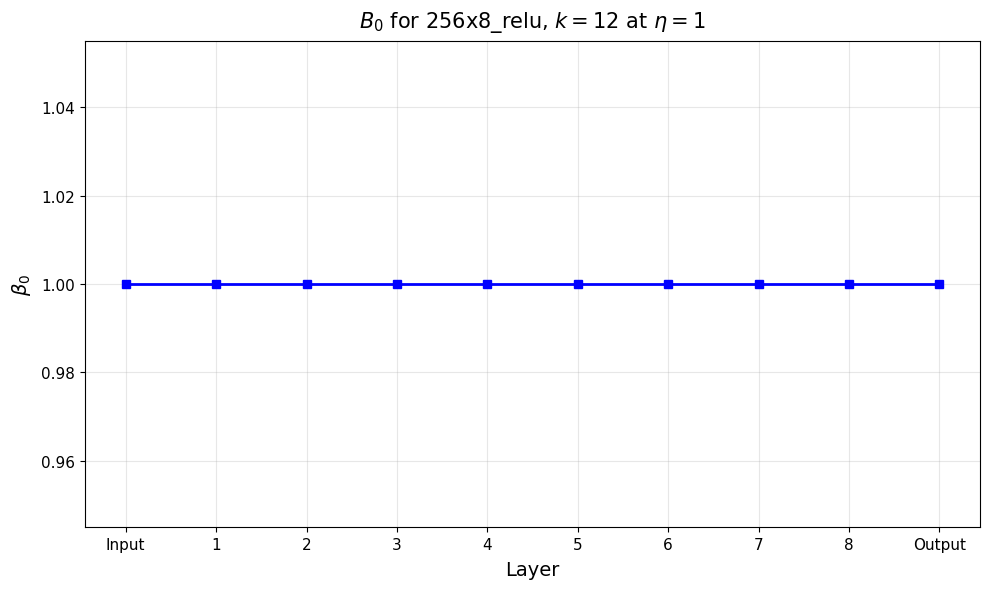

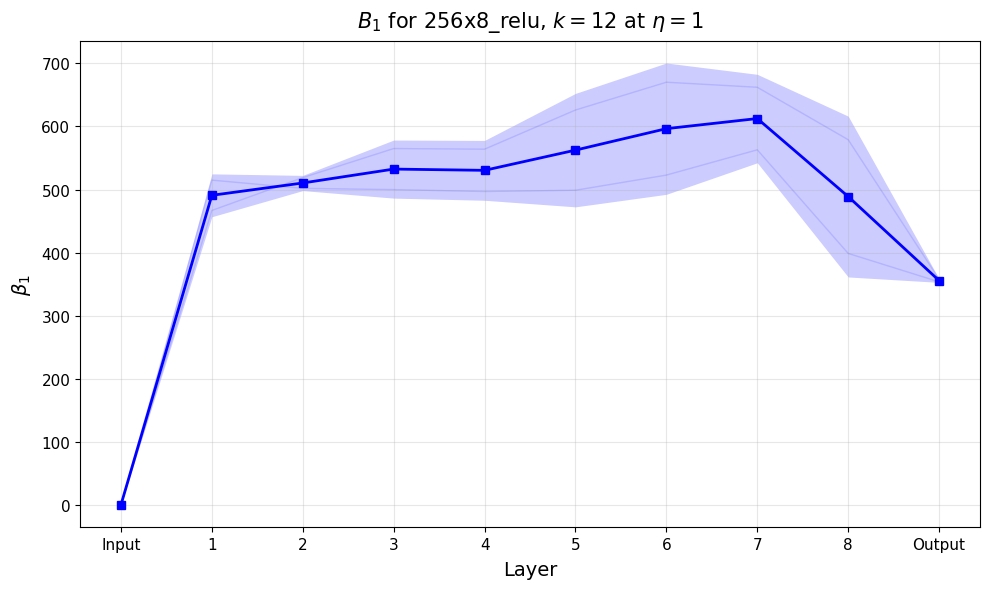

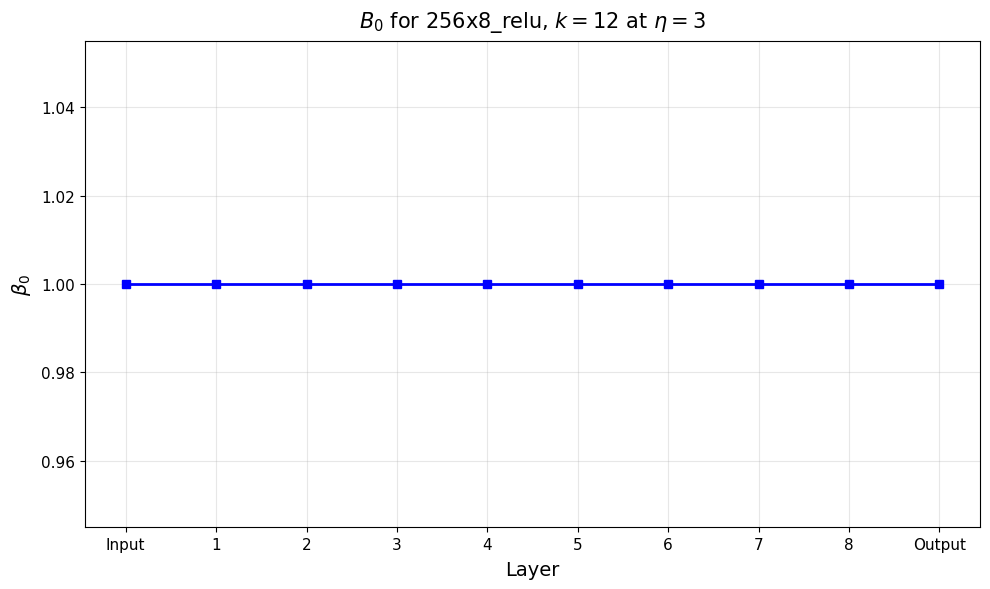

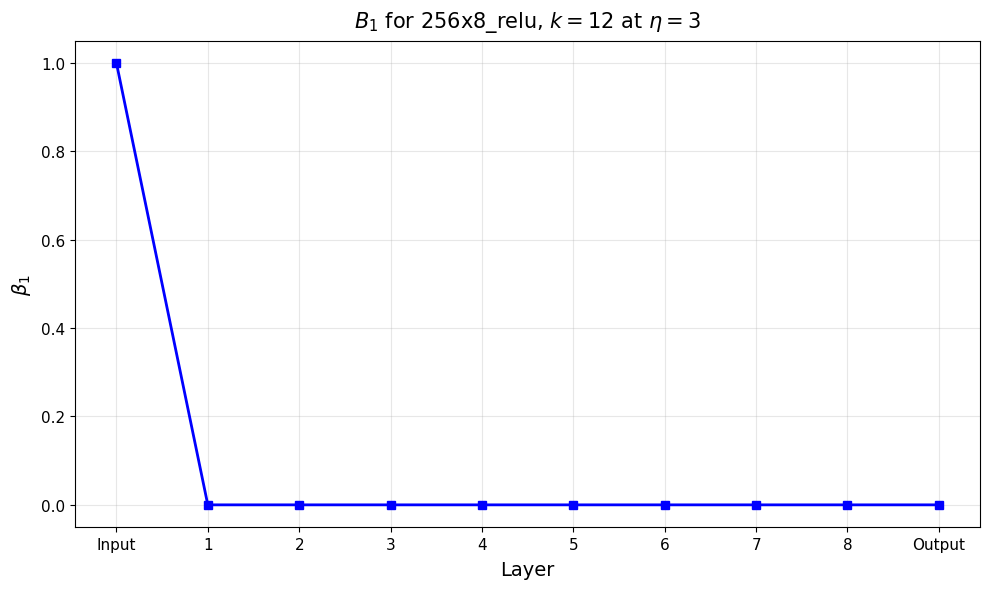

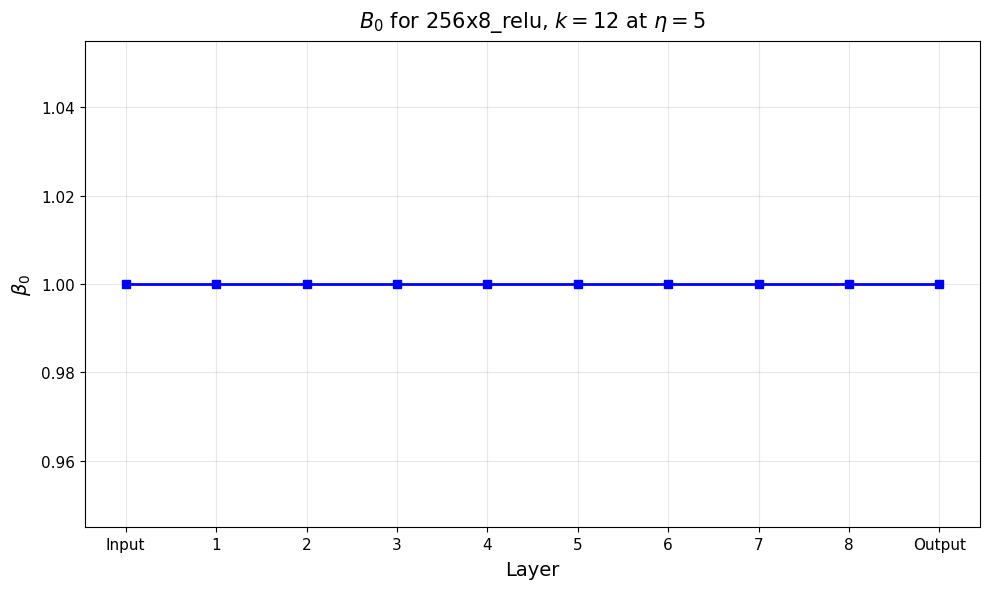

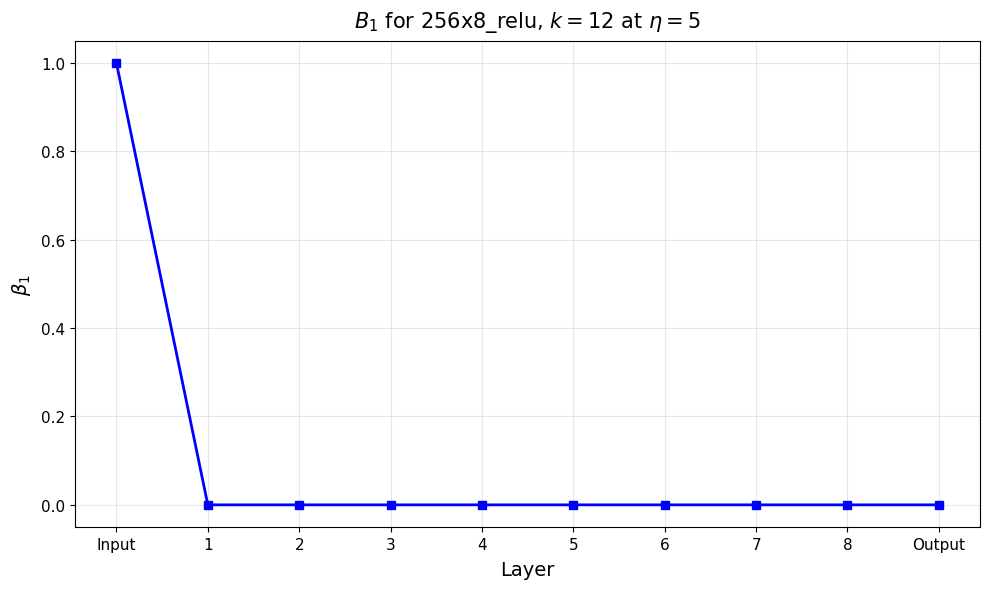

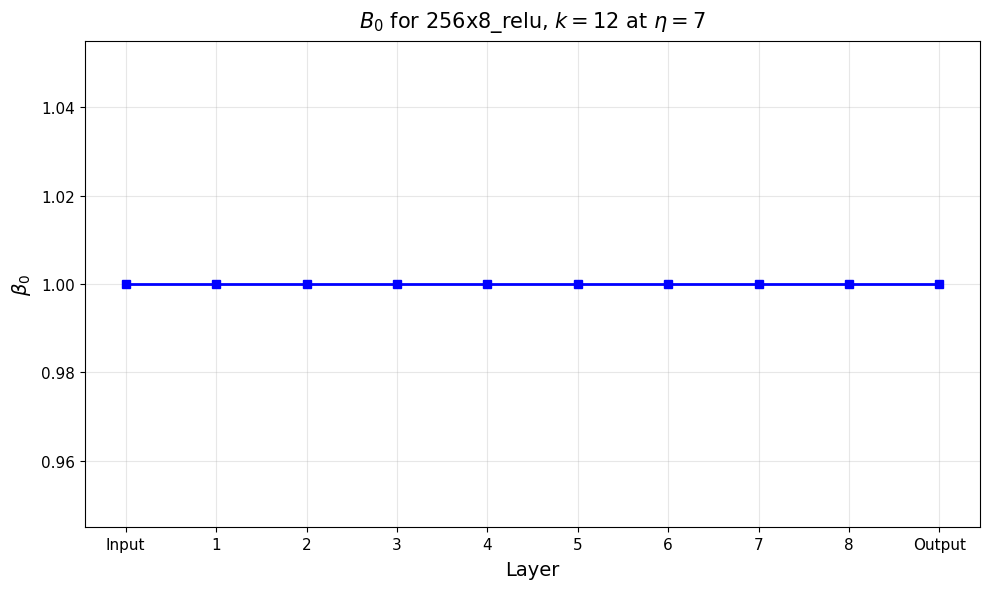

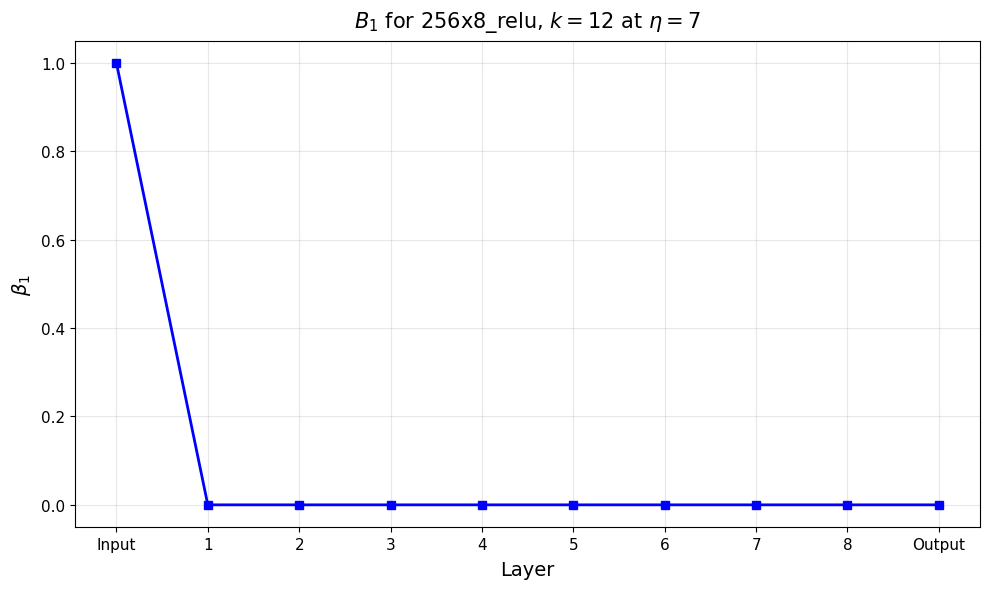

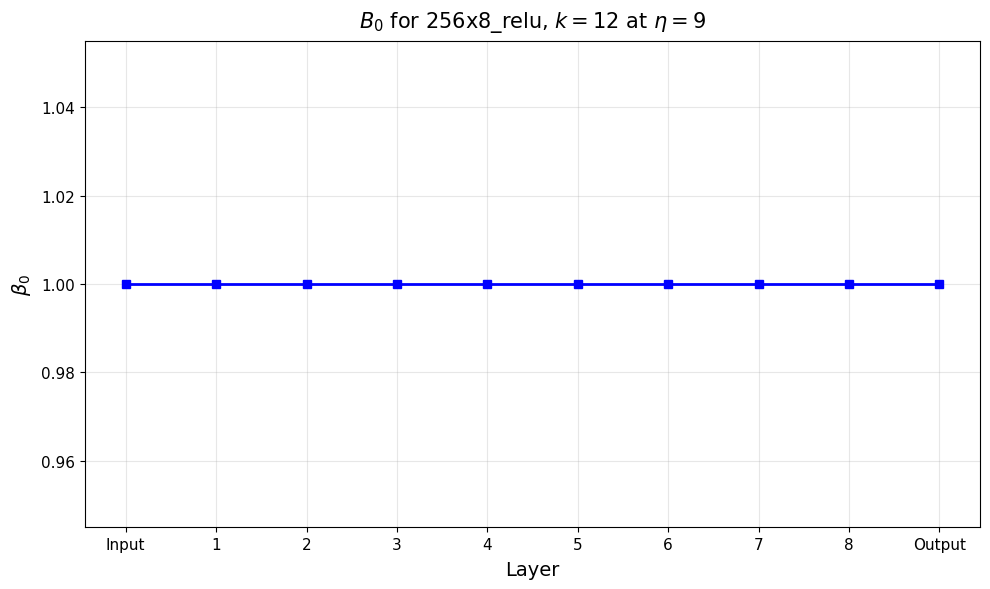

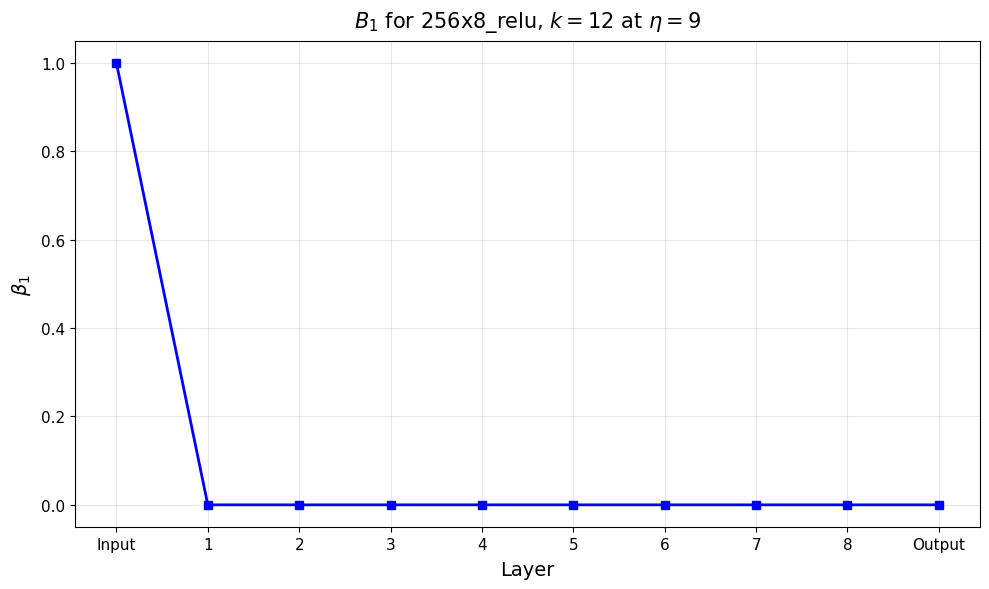

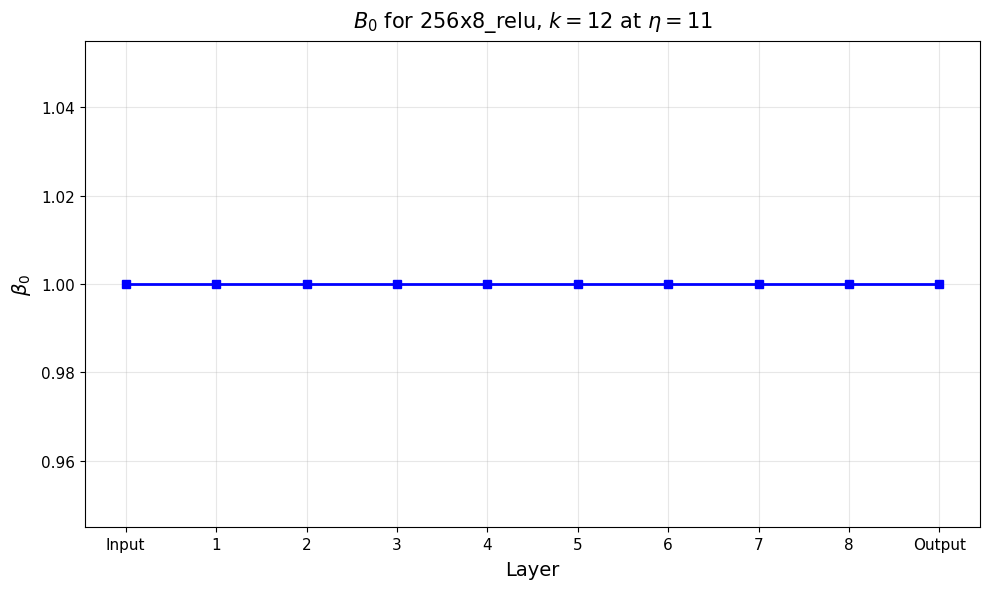

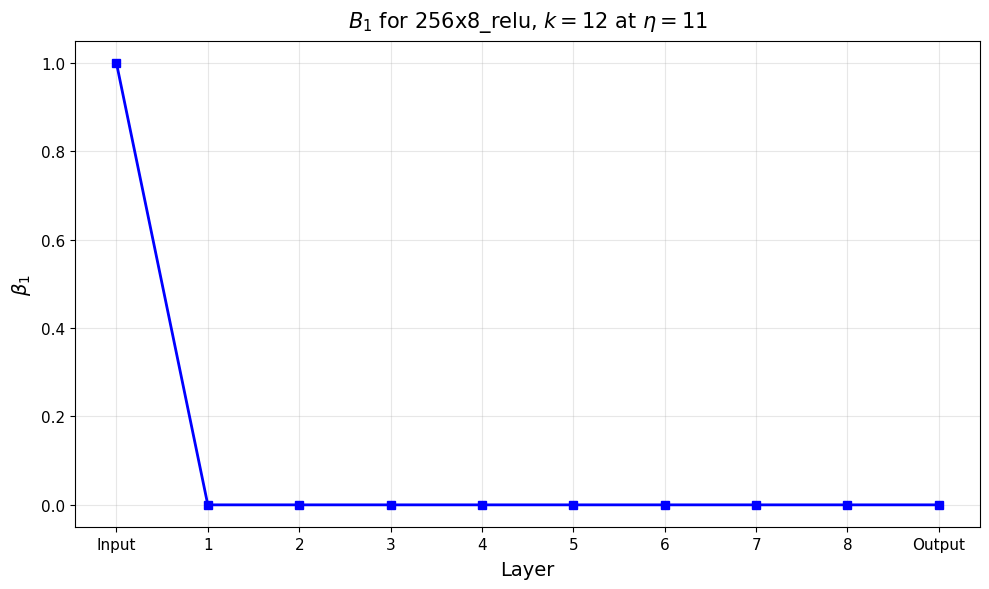

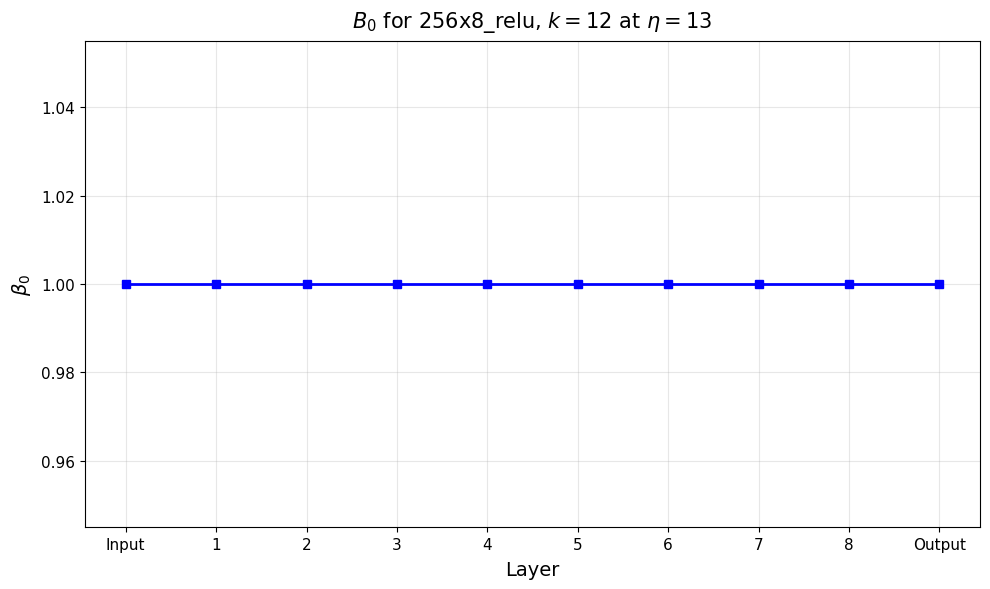

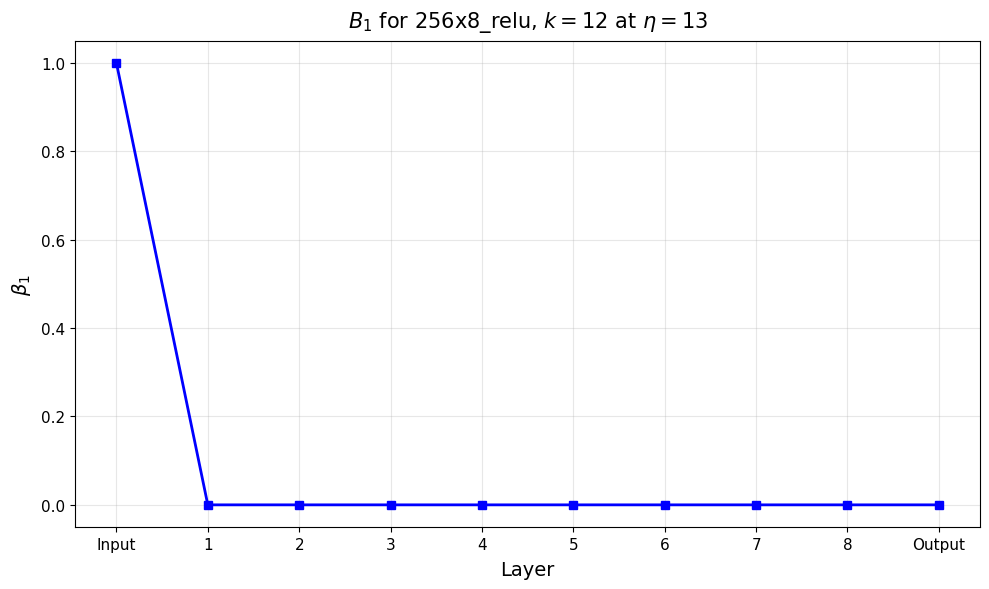

In [8]:
trainer.graph_betti_numbers(
    dir_name='tests/ripser_k12/label_0',
    k=12,
    etas=range(1, 15, 2),
    maxdim=1
)